In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [2]:
datapath='heart-1.csv'
df=pd.read_csv(datapath)

### Analysis

In [4]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
421,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
864,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
44,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
611,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
982,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Visualization

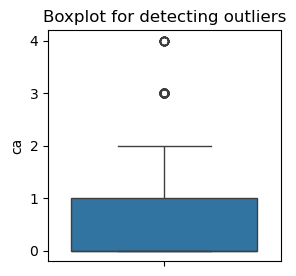

In [10]:
plt.figure(figsize=(3, 3))
sns.boxplot(data=df["ca"])
plt.title("Boxplot for detecting outliers")
plt.show()

### Preprocessing

### Model Selection

In [13]:
Y=df['target']
X=df.drop(['target'],axis=1)

In [14]:
print(Y.sample(4))
print(X.sample(4))

561    1
59     0
625    0
606    0
Name: target, dtype: int64
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
355   46    0   0       138   243    0        0      152      1      0.0   
376   59    1   1       140   221    0        1      164      1      0.0   
994   59    1   0       110   239    0        0      142      1      1.2   
744   60    0   2       102   318    0        1      160      0      0.0   

     slope  ca  thal  
355      1   0     2  
376      2   0     2  
994      1   1     3  
744      2   1     2  


In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [16]:
x_train.shape

(717, 13)

In [17]:
x_test.shape

(308, 13)

In [18]:
RF=DecisionTreeClassifier()

In [19]:
cross_val_score(RF,X,Y,cv=5)

array([1., 1., 1., 1., 1.])

In [20]:
RF.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred=RF.predict(x_test)

In [33]:
# plt.figure(figsize=(12, 8))
# plot_tree(RF, feature_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
#        'exang', 'oldpeak', 'slope', 'ca', 'thal'], class_names=['target'], filled=True)
# plt.show()

In [27]:
accuracy_score(y_pred,y_test)*100

97.07792207792207

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



In [31]:
RF.score(x_train,y_train)*100

100.0